# Deep Reinforcement Learning for OpenAI's "cartpole-v0"

In this notebook, we will perform the experiments, do hyperparameters tuning and visualize the results.

The agent classes are in the Python module agents.DQNforCartpole. 
We will first import the DQN agent and perform a number of experiments with it. 

For logging and visualization, the files logz.py and plot.py are used. They have been 
taken from UC Berkeley's course on deep reinforcement learning, homework 2, available here: https://github.com/berkeleydeeprlcourse/homework/tree/master/hw2 

## Setup

In [1]:
from agents.DQNforCartpole import DQNforCartpole
from environments import Environments
import os, time
from util.plotting import plot_result
import pickle
import json


/home/pblies/programs/anaconda3/envs/pycharm/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


Define a function to perform the experiments and save the location of 
the experiments in a separate results file. 

In [9]:
def do_experiment(allDQNs, numberOfTrials, numberOfEpisodesForEachTrial):
    # set up dict to save the locations of the results files for each
    # experiment
    target = 'data/logdirs.p'
    try:
        if os.path.getsize(target) > 0:
            with open(target, "rb") as handle:
                unpickler = pickle.Unpickler(handle)
                dict_of_logdirs = unpickler.load()
            print("Loading dictionary of logdirs")
    except:
        print("Creating empty dict")
        dict_of_logdirs = dict()
    
    for dqn in allDQNs:
        # make directory for experiment
        if not(os.path.exists('data')):
            os.makedirs('data')
        logdir = "DQN"+'-cartpole' + '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
        logdir = os.path.join('data', logdir)
        if not(os.path.exists(logdir)):
            os.makedirs(logdir)
            
        # safe logdir for current experiment for visualizaton later on
        dict_of_logdirs[dqn.exp_name] = logdir
        
        # run experiment
        dqn.run_numberOfTrials_experiments(
            numberOfTrials=numberOfTrials,
            numberOfEpisodesForEachTrial=numberOfEpisodesForEachTrial, 
            logdir=logdir
        )
        
    # save the dict_of_logdirs to disc
    pickle.dump( dict_of_logdirs, open('data/logdirs.p', 'wb'))

In [56]:
def visualize_results(set_of_numbers):
    if type(set_of_numbers) is not set:
        raise TypeError("Argument to visualize_result must be a set of numbers")
    
    dict_of_logdirs = pickle.load(open('data/logdirs.p', 'rb'))
    #for key in dict_of_logdirs:
    for exp_number in set_of_numbers:
        plot_result(dict_of_logdirs['dqn{}'.format(exp_number)],
                    'AvgScoresFor100Episodes')

First, we specify the environment to use. As of now, this is not particularly difficult because we've only implemented
one: the cartpole. 

In [2]:
# create the cartpole environment
env = Environments.importCartpole()


Importing environment CartPole-v0
----------------------------------
CartPole-v0's action space:       Discrete(2)
CartPole-v0's observation space:  Box(4,)

For the cartpole environment, the observation space is: 
obs[0]: the horizontal position of the cart (0.0 = center)
obs[1]: the velocity of the cart (0.0 = standing still)
obs[2]: the angle of the pole (0.0 = vertical)
obs[3]: the angular velocity of the cartpole (0.0 = standing still)


Next, we will instantiate a deep q-learning agent. This agent is based on Mnih et al. (2013), which means that it does 
use experience replay but does not use target networks, as their Mnih et al. (2015) paper. For the hyperparameters, 
we will use pretty much what Mnih et al. have used, with the exception of the replay memory capacity, the neural
network architecture and the replay start size. The cartpole problem is much more lower-dimensional than the 
visual input from the Atari games, so we get away with a significantly simpler function approximator, compared to the 
CNN used by DeepMind.

In [3]:
# benchmark model: hyperparameters similar to Mnih et al. (2015)
dqn1 = DQNforCartpole(environment=env,
                      learning_rate=0.00025,
                      discount_rate=0.99,
                      exploration_rate=1.0,
                      exploration_rate_min=0.1,
                      exploration_rate_decay=0.999,
                      replay_memory_capacity=10000, 
                      replay_sampling_batch_size=32,
                      nn_architecture=[10],
                      replay_start_size=32,
                      exp_name="dqn1"
                      )

Initializing DQN agent...
 .... dimension of state space: 4
 .... dimension of action space: 2


We will perform some parameter tuning. First, we will double the number of hidden layers.

In [4]:
dqn2 = DQNforCartpole(environment=env,
                      learning_rate=0.00025,
                      discount_rate=0.99,
                      exploration_rate=1.0,
                      exploration_rate_min=0.1,
                      exploration_rate_decay=0.999,
                      replay_memory_capacity=10000, 
                      replay_sampling_batch_size=32,
                      nn_architecture=[10, 10],
                      replay_start_size=32,
                      exp_name="dqn2"
                      )

Initializing DQN agent...
 .... dimension of state space: 4
 .... dimension of action space: 2


In [5]:
dqn3 = DQNforCartpole(environment=env,
                      learning_rate=0.00025,
                      discount_rate=0.99,
                      exploration_rate=1.0,
                      exploration_rate_min=0.1,
                      exploration_rate_decay=0.999,
                      replay_memory_capacity=10000, 
                      replay_sampling_batch_size=32,
                      nn_architecture=[20],
                      replay_start_size=32,
                      exp_name="dqn3"
                      )

Initializing DQN agent...
 .... dimension of state space: 4
 .... dimension of action space: 2


## Performing the Experiments

Perform the experiment with the specified agents for a certain number of 
trials and a given number of episodes in each trial. 
#### WARNING: executing the next cell can take a significant amount of time!

In [55]:
allDQNs = [dqn1, dqn2, dqn3]
numberOfTrials = 2
number_of_episodes_for_each_trial = 30

do_experiment(
    allDQNs=allDQNs, 
    numberOfTrials=numberOfTrials,
    numberOfEpisodesForEachTrial=number_of_episodes_for_each_trial
    )

Loading dictionary of logdirs
Logging data to data/DQN-cartpole_29-01-2018_15-52-18/trial_1/log.txt
Starting new trial
---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |               1 |
|                    Time |           0.417 |
|           AverageReturn |            21.8 |
|               StdReturn |            10.4 |
|               MaxReturn |              57 |
|               MinReturn |               8 |
|                 Epsilon |           0.999 |
|               EpLenMean |            21.8 |
|                EpLenStd |            10.4 |
| AvgScoresFor100Episodes |            20.8 |
---------------------------------------------
---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |               2 |
|                    Time |           0.473 |
|      

---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |              17 |
|                    Time |            1.38 |
|           AverageReturn |            22.4 |
|               StdReturn |            11.5 |
|               MaxReturn |              57 |
|               MinReturn |               8 |
|                 Epsilon |           0.983 |
|               EpLenMean |            22.4 |
|                EpLenStd |            11.5 |
| AvgScoresFor100Episodes |            21.4 |
---------------------------------------------
---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |              18 |
|                    Time |            1.44 |
|           AverageReturn |            22.1 |
|               StdReturn |            11.5 |
|               MaxReturn |       

---------------------------------------------
|                 TrialNo |               2 |
|                    seed |               2 |
|                 Episode |               1 |
|                    Time |           0.439 |
|           AverageReturn |            22.9 |
|               StdReturn |            11.4 |
|               MaxReturn |              59 |
|               MinReturn |              10 |
|                 Epsilon |           0.999 |
|               EpLenMean |            22.9 |
|                EpLenStd |            11.4 |
| AvgScoresFor100Episodes |            21.9 |
---------------------------------------------
---------------------------------------------
|                 TrialNo |               2 |
|                    seed |               2 |
|                 Episode |               2 |
|                    Time |           0.497 |
|           AverageReturn |            22.6 |
|               StdReturn |            11.4 |
|               MaxReturn |       

---------------------------------------------
|                 TrialNo |               2 |
|                    seed |               2 |
|                 Episode |              17 |
|                    Time |            1.45 |
|           AverageReturn |            22.8 |
|               StdReturn |            10.5 |
|               MaxReturn |              59 |
|               MinReturn |              10 |
|                 Epsilon |           0.983 |
|               EpLenMean |            22.8 |
|                EpLenStd |            10.5 |
| AvgScoresFor100Episodes |            21.8 |
---------------------------------------------
---------------------------------------------
|                 TrialNo |               2 |
|                    seed |               2 |
|                 Episode |              18 |
|                    Time |            1.52 |
|           AverageReturn |            22.7 |
|               StdReturn |            10.4 |
|               MaxReturn |       

---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |               1 |
|                    Time |           0.509 |
|           AverageReturn |            24.9 |
|               StdReturn |            12.9 |
|               MaxReturn |              60 |
|               MinReturn |               9 |
|                 Epsilon |           0.999 |
|               EpLenMean |            24.9 |
|                EpLenStd |            12.9 |
| AvgScoresFor100Episodes |            23.9 |
---------------------------------------------
---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |               2 |
|                    Time |           0.575 |
|           AverageReturn |            24.7 |
|               StdReturn |            12.8 |
|               MaxReturn |       

---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |              15 |
|                    Time |            1.44 |
|           AverageReturn |            25.5 |
|               StdReturn |            13.4 |
|               MaxReturn |              63 |
|               MinReturn |               9 |
|                 Epsilon |           0.985 |
|               EpLenMean |            25.5 |
|                EpLenStd |            13.4 |
| AvgScoresFor100Episodes |            24.5 |
---------------------------------------------
---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |              16 |
|                    Time |            1.51 |
|           AverageReturn |            25.3 |
|               StdReturn |            13.3 |
|               MaxReturn |       

---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |              30 |
|                    Time |            2.43 |
|           AverageReturn |            24.7 |
|               StdReturn |            12.5 |
|               MaxReturn |              63 |
|               MinReturn |               9 |
|                 Epsilon |            0.97 |
|               EpLenMean |            24.7 |
|                EpLenStd |            12.5 |
| AvgScoresFor100Episodes |            23.7 |
---------------------------------------------
Logging data to data/DQN-cartpole_29-01-2018_15-52-22/trial_2/log.txt
Starting new trial
---------------------------------------------
|                 TrialNo |               2 |
|                    seed |               2 |
|                 Episode |               1 |
|                    Time |           0.524 |
|           AverageReturn |          

---------------------------------------------
|                 TrialNo |               2 |
|                    seed |               2 |
|                 Episode |              13 |
|                    Time |            1.32 |
|           AverageReturn |            22.3 |
|               StdReturn |            11.5 |
|               MaxReturn |              63 |
|               MinReturn |               9 |
|                 Epsilon |           0.987 |
|               EpLenMean |            22.3 |
|                EpLenStd |            11.5 |
| AvgScoresFor100Episodes |            21.3 |
---------------------------------------------
---------------------------------------------
|                 TrialNo |               2 |
|                    seed |               2 |
|                 Episode |              14 |
|                    Time |            1.38 |
|           AverageReturn |            22.3 |
|               StdReturn |            11.4 |
|               MaxReturn |       

---------------------------------------------
|                 TrialNo |               2 |
|                    seed |               2 |
|                 Episode |              27 |
|                    Time |            2.27 |
|           AverageReturn |            23.4 |
|               StdReturn |            12.3 |
|               MaxReturn |              63 |
|               MinReturn |               9 |
|                 Epsilon |           0.973 |
|               EpLenMean |            23.4 |
|                EpLenStd |            12.3 |
| AvgScoresFor100Episodes |            22.4 |
---------------------------------------------
---------------------------------------------
|                 TrialNo |               2 |
|                    seed |               2 |
|                 Episode |              28 |
|                    Time |            2.34 |
|           AverageReturn |            23.3 |
|               StdReturn |            12.2 |
|               MaxReturn |       

---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |              12 |
|                    Time |            1.23 |
|           AverageReturn |            21.2 |
|               StdReturn |            11.1 |
|               MaxReturn |              54 |
|               MinReturn |              10 |
|                 Epsilon |           0.988 |
|               EpLenMean |            21.2 |
|                EpLenStd |            11.1 |
| AvgScoresFor100Episodes |            20.2 |
---------------------------------------------
---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |              13 |
|                    Time |            1.29 |
|           AverageReturn |            20.9 |
|               StdReturn |            11.1 |
|               MaxReturn |       

---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |              26 |
|                    Time |            2.16 |
|           AverageReturn |            20.8 |
|               StdReturn |            10.7 |
|               MaxReturn |              54 |
|               MinReturn |               9 |
|                 Epsilon |           0.974 |
|               EpLenMean |            20.8 |
|                EpLenStd |            10.7 |
| AvgScoresFor100Episodes |            19.8 |
---------------------------------------------
---------------------------------------------
|                 TrialNo |               1 |
|                    seed |               1 |
|                 Episode |              27 |
|                    Time |            2.23 |
|           AverageReturn |            20.7 |
|               StdReturn |            10.7 |
|               MaxReturn |       

---------------------------------------------
|                 TrialNo |               2 |
|                    seed |               2 |
|                 Episode |               9 |
|                    Time |            1.07 |
|           AverageReturn |            21.9 |
|               StdReturn |            12.7 |
|               MaxReturn |              69 |
|               MinReturn |               9 |
|                 Epsilon |           0.991 |
|               EpLenMean |            21.9 |
|                EpLenStd |            12.7 |
| AvgScoresFor100Episodes |            20.9 |
---------------------------------------------
---------------------------------------------
|                 TrialNo |               2 |
|                    seed |               2 |
|                 Episode |              10 |
|                    Time |            1.13 |
|           AverageReturn |            22.5 |
|               StdReturn |            13.1 |
|               MaxReturn |       

---------------------------------------------
|                 TrialNo |               2 |
|                    seed |               2 |
|                 Episode |              25 |
|                    Time |            2.04 |
|           AverageReturn |            22.1 |
|               StdReturn |            11.7 |
|               MaxReturn |              69 |
|               MinReturn |               9 |
|                 Epsilon |           0.975 |
|               EpLenMean |            22.1 |
|                EpLenStd |            11.7 |
| AvgScoresFor100Episodes |            21.1 |
---------------------------------------------
---------------------------------------------
|                 TrialNo |               2 |
|                    seed |               2 |
|                 Episode |              26 |
|                    Time |             2.1 |
|           AverageReturn |            22.1 |
|               StdReturn |            11.6 |
|               MaxReturn |       

/home/pblies/programs/anaconda3/envs/pycharm/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


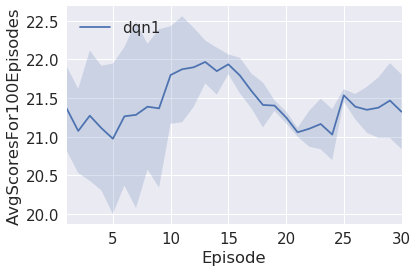

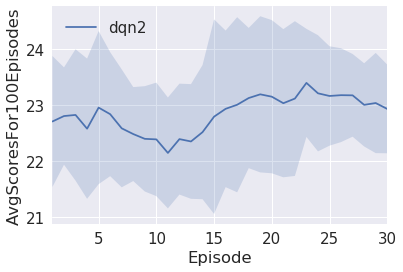

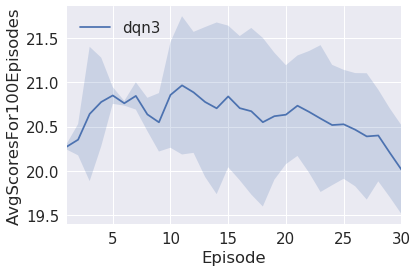

In [57]:
visualize_results(set([1,2,3]))